In [1]:
!pip install dagshub mlflow

In [2]:
import dagshub
dagshub.init(repo_owner='giorgitorro', repo_name='FraudDetection_gtoro22', mlflow=True)

Accessing as giorgitorro

Initialized MLflow to track repo "giorgitorro/FraudDetection_gtoro22"

Repository giorgitorro/FraudDetection_gtoro22 initialized!

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ieee-fraud-detection/sample_submission.csv
/kaggle/input/ieee-fraud-detection/test_identity.csv
/kaggle/input/ieee-fraud-detection/train_identity.csv
/kaggle/input/ieee-fraud-detection/test_transaction.csv
/kaggle/input/ieee-fraud-detection/train_transaction.csv


In [4]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)        
pd.set_option('display.expand_frame_repr', False)

In [5]:
train_identity = pd.read_csv('/kaggle/input/ieee-fraud-detection/train_identity.csv')
train_transaction = pd.read_csv('/kaggle/input/ieee-fraud-detection/train_transaction.csv')

In [6]:
train_df = train_transaction.merge(train_identity, on='TransactionID', how='left')

In [7]:
train_df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0

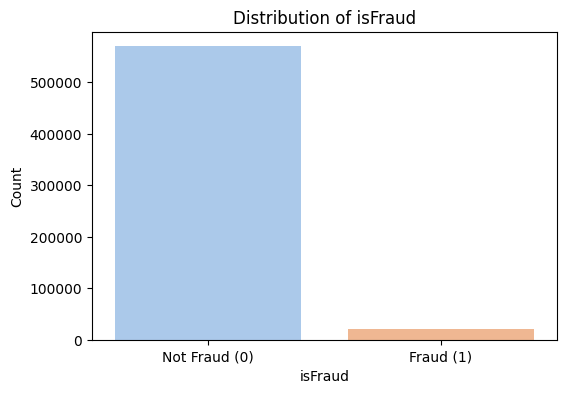

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Count the values of isFraud
fraud_counts = train_df['isFraud'].value_counts()

# 2. Create the plot
plt.figure(figsize=(6, 4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='pastel')

plt.xticks([0, 1], ['Not Fraud (0)', 'Fraud (1)'])
plt.ylabel('Count')
plt.title('Distribution of isFraud')

plt.show()

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np

class CustomPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=3, extra_cat_cols=None):
        self.threshold = threshold
        self.extra_cat_cols = extra_cat_cols if extra_cat_cols is not None else []

    def fit(self, X, y):
        # Identify categorical columns
        cat_cols = [col for col in X.columns if X[col].dtype == 'object'] + self.extra_cat_cols
        s = X[cat_cols].nunique()
        self.woe_columns = list(s[s > self.threshold].index)
        self.one_hot_columns = list(s[s <= self.threshold].index)

        # Ensure no overlap and valid columns
        self.woe_columns = [col for col in self.woe_columns if col in X.columns]
        self.one_hot_columns = [col for col in self.one_hot_columns if col in X.columns]

        # Generate fill NaN values for WoE columns
        self.woe_columns_fill_na = X[self.woe_columns].mode().T[0].to_dict()
        
        df_woe = X.copy()
        target_col = 'target'
        df_woe[target_col] = y

        woe_mappings = {}
        iv_values = {}
        
        for col in self.woe_columns:
            groups = df_woe.groupby([col])[target_col].agg(['count', 'sum'])
            groups.columns = ['n_obs', 'n_pos']
            groups['n_neg'] = groups['n_obs'] - groups['n_pos']
            
            groups['prop_pos'] = groups['n_pos'] / groups['n_pos'].sum()
            groups['prop_neg'] = groups['n_neg'] / groups['n_neg'].sum()
            
            groups['woe'] = np.log(groups['prop_pos'] / groups['prop_neg'])
            groups['iv'] = (groups['prop_pos'] - groups['prop_neg']) * groups['woe']
            
            groups.replace([np.inf, -np.inf], 0, inplace=True)
            groups.fillna(0, inplace=True)
            
            woe_dict = groups['woe'].to_dict()
            iv = groups['iv'].sum()
            
            woe_mappings[col] = woe_dict
            iv_values[col] = iv

        self.woe_mappings = woe_mappings
        self.iv_values = iv_values
        return self

    def transform(self, X):
        X_transformed = X.copy()
        for col in self.woe_columns:
            X_transformed[f'{col}_woe'] = X_transformed[col].map(self.woe_mappings[col])
            X_transformed.drop(columns=col, inplace=True)

        X_transformed = pd.get_dummies(X_transformed, columns=self.one_hot_columns, drop_first=True, dummy_na=True, dtype=int)

        n = X_transformed.isna().mean()
        na_cols = list(n[n > 0].index)
        if na_cols:
            print(f"Columns with NaNs after transformation: {na_cols}")
            for col in na_cols:
                if col.endswith('_woe'):
                    name = col.replace('_woe', '')
                    if name in self.woe_columns_fill_na:
                        X_transformed[col] = X_transformed[col].fillna(
                            self.woe_mappings[name].get(self.woe_columns_fill_na[name], 0)
                        )
                    else:
                        X_transformed[col] = X_transformed[col].fillna(0)
                else:
                    X_transformed[col] = X_transformed[col].fillna(0)
        
        return X_transformed

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin

class Handle_Nulls(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.99, fill_value=999):
        self.threshold = threshold
        self.fill_value = fill_value
        self.cols_to_drop = []

    def fit(self, X, y=None):
        missing_ratio = X.isnull().mean()
        self.cols_to_drop = missing_ratio[missing_ratio > self.threshold].index.tolist()
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy.drop(columns=self.cols_to_drop, inplace=True, errors='ignore')
        X_copy.fillna(self.fill_value, inplace=True)
        return X_copy


In [11]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class VCorrelationExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, n_features=30, target_col='isFraud'):
        self.n_features = n_features
        self.target_col = target_col
        self.v_cols = [f'V{i}' for i in range(1, 340)]
        self.selected_features = []

    def fit(self, X, y=None):
        if y is None:
            if self.target_col not in X.columns:
                raise ValueError(f"Target column '{self.target_col}' not found in input data.")
            y = X[self.target_col]
        
        X_v = X[self.v_cols].copy()
        X_v = X_v.fillna(999)
        correlations = X_v.corrwith(y).abs().sort_values(ascending=False)
        self.selected_features = correlations.head(self.n_features).index.tolist()
        return self

    def transform(self, X):
        X_copy = X.copy()

        # Ensure all selected V columns are present
        missing_cols = [col for col in self.selected_features if col not in X_copy.columns]
        if missing_cols:
            raise ValueError(f'Missing selected V columns in input: {missing_cols}')

        # Extract selected V features
        v_corr_df = X_copy[self.selected_features].fillna(999)

        # Drop all original V columns
        drop_v_cols = [col for col in self.v_cols if col in X_copy.columns]
        X_copy.drop(columns=drop_v_cols, inplace=True)

        # Add back the selected V columns
        X_copy = pd.concat([X_copy, v_corr_df], axis=1)
        return X_copy

In [12]:
from sklearn.model_selection import train_test_split

# Check if log_TransactionAmt exists in train_df
columns_to_drop = ['isFraud']

# Prepare features and target
X = train_df.drop(columns=columns_to_drop, axis=1)
y = train_df['isFraud']

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [13]:
!pip install --upgrade scikit-learn imbalanced-learn

In [14]:
import numpy as np
import mlflow
import mlflow.sklearn
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, f1_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

# Disable autolog for full control
mlflow.sklearn.autolog(disable=True)

# Define full pipeline: preprocessing + undersampling + model
full_pipeline = Pipeline([
    ('missing_nulls', Handle_Nulls(threshold=0.99, fill_value=999)),
    ('custom_preprocessor', CustomPreprocessor(threshold=3)),
    ('v_selector', VCorrelationExtractor(n_features=30, target_col='isFraud')),
    ('scaler', StandardScaler()),
    ('undersample', RandomUnderSampler(random_state=42)),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ))
])

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
oof_preds = []
oof_true = []

with mlflow.start_run(run_name="random_forest_undersample_pipeline"):
    for fold, (train_idx, valid_idx) in enumerate(cv.split(X_train, y_train)):
        X_tr = X_train.iloc[train_idx]
        y_tr = y_train.iloc[train_idx]
        X_val = X_train.iloc[valid_idx]
        y_val = y_train.iloc[valid_idx]

        # Fit pipeline on training data
        full_pipeline.fit(X_tr, y_tr)

        # Predict on validation set
        preds = full_pipeline.predict_proba(X_val)[:, 1]

        oof_preds.extend(preds)
        oof_true.extend(y_val)

    # Metrics
    fpr, tpr, thresholds = roc_curve(oof_true, oof_preds)
    roc_auc = auc(fpr, tpr)

    pred_labels = np.array(oof_preds) >= 0.5
    f1 = f1_score(oof_true, pred_labels)
    precision = precision_score(oof_true, pred_labels)
    recall = recall_score(oof_true, pred_labels)
    accuracy = accuracy_score(oof_true, pred_labels)

    # Log metrics
    mlflow.log_metric("roc_auc", roc_auc)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("accuracy", accuracy)

    # Log parameters
    mlflow.log_param("classifier", "RandomForestClassifier")
    mlflow.log_param("undersampling", "RandomUnderSampler")
    mlflow.log_param("v_features_selected", 30)

    # Save ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.grid()
    plt.savefig("roc_curve.png")
    plt.close()

    mlflow.log_artifact("roc_curve.png")

    # Log full pipeline model
    mlflow.sklearn.log_model(full_pipeline, artifact_path="rf_pipeline_model")

    print(f"Mean ROC AUC: {roc_auc:.4f}")


Columns with NaNs after transformation: ['id_31_woe', 'id_33_woe', 'DeviceInfo_woe']
Columns with NaNs after transformation: ['id_31_woe', 'id_33_woe', 'DeviceInfo_woe']
Columns with NaNs after transformation: ['id_30_woe', 'id_31_woe', 'id_33_woe', 'DeviceInfo_woe']


2025/04/29 15:59:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Mean ROC AUC: 0.9271
🏃 View run random_forest_undersample_pipeline at: https://dagshub.com/giorgitorro/FraudDetection_gtoro22.mlflow/#/experiments/0/runs/9ce7561ee59240fbbec41b242a3556d4
🧪 View experiment at: https://dagshub.com/giorgitorro/FraudDetection_gtoro22.mlflow/#/experiments/0
